In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies_data = pd.read_csv('Datasets/cleaned-movies-metainformation.csv')
credits_data = pd.read_csv('credits.csv')

In [4]:
movies_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
credits_data.columns

Index(['cast', 'crew', 'id'], dtype='object')

In [6]:
movies_data = movies_data[['id', 'runtime', 'budget']]

In [7]:
movies_data = movies_data.merge(credits_data,on='id') # merge the movies data and credits data on the id column
movies_data

id  runtime      budget  \
0         862     81.0  30000000.0   
1        8844    104.0  65000000.0   
2       15602    101.0         NaN   
3       31357    127.0  16000000.0   
4       11862    106.0         NaN   
...       ...      ...         ...   
44051  439050     90.0         NaN   
44052  111109    360.0         NaN   
44053   67758     90.0         NaN   
44054  227506     87.0         NaN   
44055  461257     75.0         NaN   

                                                    cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
44051  [{'cast_id': 0, 'character': '', 'credit_id': ...   
44052  [{'cast_id': 1002, 'character': 'Sister Angela...   
44053  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
44054  [{'cast_id': 2, 'character': '', 'credit_id': ...   
44055                                                 []   

                                                    crew  
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...  
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...  
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...  
3      [{'credit_id': '52fe44779251416c91011acb', 'de...  
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...  
...                                                  ...  
44051  [{'credit_id': '5894a97d925141426c00818c', 'de...  
44052  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  
44053  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...  
44054  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  
44055  [{'credit_id': '593e676c92514105b702e68e', 'de...  

[44056 rows x 5 columns]

In [8]:
movies_data['crew'] 

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
44051    [{'credit_id': '5894a97d925141426c00818c', 'de...
44052    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
44053    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
44054    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
44055    [{'credit_id': '593e676c92514105b702e68e', 'de...
Name: crew, Length: 44056, dtype: object

In [9]:
def makeColumn(series, key):
    count = 0
    col = []
    string = ""
    for lis in series:
        li = lis.strip('][').split(', ')
        for dic in li:
            di = dic.strip('}{').replace("'", '').split(':')
            if di[0] == key:
                string += di[1]
                string += ","
        col.append(string)
        string = ""
    return pd.Series(col)

In [10]:
movies_data['cast_name'] = makeColumn(movies_data['cast'], 'name') # CAST NAMES
movies_data['cast_name']

0         Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1         Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2         Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
3         Whitney Houston, Angela Bassett, Loretta Devi...
4         Steve Martin, Diane Keaton, Martin Short, Kim...
                               ...                        
44051           Leila Hatami, Kourosh Tahami, Elham Korda,
44052     Angel Aquino, Perry Dizon, Hazel Orencio, Joe...
44053     Erika Eleniak, Adam Baldwin, Julie du Page, J...
44054     Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
44055                                                     
Name: cast_name, Length: 44056, dtype: object

In [11]:
movies_data['cast_gender'] = makeColumn(movies_data['cast'], 'gender') # CAST GENDER
movies_data['cast_gender'] 

0                   2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2,
1         2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...
2                                     2, 2, 1, 1, 1, 2, 2,
3                            1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
4                      2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1,
                               ...                        
44051                                             1, 0, 0,
44052                     1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
44053         1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
44054                                       2, 1, 2, 0, 1,
44055                                                     
Name: cast_gender, Length: 44056, dtype: object

In [12]:
movies_data['crew_name'] = makeColumn(movies_data['crew'], 'name') # CREW NAMES
movies_data['crew_name'] 

0         John Lasseter, Joss Whedon, Andrew Stanton, J...
1         Larry J. Franco, Jonathan Hensleigh, James Ho...
2         Howard Deutch, Mark Steven Johnson, Mark Stev...
3         Forest Whitaker, Ronald Bass, Ronald Bass, Ez...
4         Alan Silvestri, Elliot Davis, Nancy Meyers, N...
                               ...                        
44051     Hamid Nematollah, Hamid Nematollah, Farshad M...
44052     Lav Diaz, Lav Diaz, Dante Perez, Lav Diaz, La...
44053     Mark L. Lester, C. Courtney Joyner, Jeffrey G...
44054               Yakov Protazanov, Joseph N. Ermolieff,
44055                                       Daisy Asquith,
Name: crew_name, Length: 44056, dtype: object

In [13]:
movies_data['crew_gender'] = makeColumn(movies_data['crew'], 'gender') # CREW GENDER
movies_data['crew_gender'] 

0         2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, ...
1          2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
2                                              2, 2, 2, 2,
3                            2, 0, 0, 2, 1, 0, 0, 0, 2, 0,
4                                     2, 2, 1, 1, 2, 2, 2,
                               ...                        
44051                           0, 0, 0, 0, 0, 0, 0, 0, 0,
44052                                    0, 0, 0, 0, 0, 0,
44053                                       2, 2, 2, 0, 2,
44054                                                0, 2,
44055                                                   0,
Name: crew_gender, Length: 44056, dtype: object

In [14]:
movies_data['crew_gender'][0] # Looking at genders in the first row

' 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,'

In [15]:
movies_data['crew_name'][0]  # Now we see that 2 corresponds to male, 1 to female, 0 may be prefer not to say

' John Lasseter, Joss Whedon, Andrew Stanton, Joel Cohen, Alec Sokolow, Bonnie Arnold, Ed Catmull, Ralph Guggenheim, Steve Jobs, Lee Unkrich, Ralph Eggleston, Robert Gordon, Mary Helen Leasman, Kim Blanchette, Marilyn McCoppen, Randy Newman, Dale E. Grahn, Robin Cooper, John Lasseter, Pete Docter, Joe Ranft, Patsy Bouge, Norm DeCarlo, Ash Brannon, Randy Newman, Roman Figun, Don Davis, James Flamberg, Mary Beth Smith, Rick Mackay, Susan Bradley, William Reeves, Randy Newman, Andrew Stanton, Pete Docter, Gary Rydstrom, Karen Robert Jackson, Chris Montan, Rich Quade, Michael Berenstein, Colin Brady, Davey Crockett Feiten, Angie Glocka, Rex Grignon, Tom K. Gurney, Jimmy Hayward, Hal T. Hickel, Karen Kiser, Anthony B. LaMolinara, Guionne Leroy, Bud Luckey, Les Major, Glenn McQueen, Mark Oftedal, Jeff Pidgeon, Jeff Pratt, Steve Rabatich, Roger Rose, Steve Segal, Doug Sheppeck, Alan Sperling, Doug Sweetland, David Tart, Ken Willard, Thomas Porter, Mark Thomas Henne, Oren Jacob, Darwyn Peachey

In [16]:
crg = movies_data['crew_gender'].replace(',', '')
crg 

0         2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, ...
1          2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
2                                              2, 2, 2, 2,
3                            2, 0, 0, 2, 1, 0, 0, 0, 2, 0,
4                                     2, 2, 1, 1, 2, 2, 2,
                               ...                        
44051                           0, 0, 0, 0, 0, 0, 0, 0, 0,
44052                                    0, 0, 0, 0, 0, 0,
44053                                       2, 2, 2, 0, 2,
44054                                                0, 2,
44055                                                   0,
Name: crew_gender, Length: 44056, dtype: object

In [17]:
crg_list = []
for i in movies_data['crew_gender']:
    crg_list += i.replace(' ', '').split(",")
print(crg_list)

['2', '2', '2', '2', '0', '1', '0', '2', '2', '2', '2', '2', '0', '0', '0', '2', '0', '0', '2', '2', '0', '0', '0', '2', '2', '0', '2', '0', '0', '0', '0', '0', '2', '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '2', '0', '2', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '2', '0', '2', '0', '1', '0', '0', '1', '0', '', '2', '2', '2', '2', '2', '0', '0', '2', '2', '2', '2', '2', '2', '2', '2', '2', '', '2', '2', '2', '2', '', '2', '0', '0', '2', '1', '0', '0', '0', '2', '0', '', '2', '2', '1', '1', '2', '2', '2', '', '2', '2', '2', '2', '2', '2', '2', '0', '0', '2', '1', '2', '1', '1', '2', '0', '0', '0', '0', '2', '2', '1', '0', '1', '0', '0', '0', '0', '0', '0', '2', '1', '0', '0', '2', '0', '0', '0', '0', '0', '2', '2', '0', '0', '0', '0', '2', '2', '0', '0', '0', '0', '0',

In [18]:
crg_list.count('2')

158636

In [19]:
crg_list.count('1')

31019

In [20]:
crg_list.count('0')

268903

In [21]:
crg_total = crg_list.count('2') + crg_list.count('1') + crg_list.count('0')
crg_total

458558

In [22]:
crg_list.count('2')/crg_total # male

0.34594533297859814

In [23]:
crg_list.count('1')/crg_total # female

0.06764465999938939

In [24]:
crg_list.count('0')/crg_total # No response

0.5864100070220125

In [25]:
cag = movies_data['cast_gender'].replace(',', '')
cag

0                   2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2,
1         2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ...
2                                     2, 2, 1, 1, 1, 2, 2,
3                            1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
4                      2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1,
                               ...                        
44051                                             1, 0, 0,
44052                     1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
44053         1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
44054                                       2, 1, 2, 0, 1,
44055                                                     
Name: cast_gender, Length: 44056, dtype: object

In [26]:
cag_list = []
for i in movies_data['cast_gender']:
    cag_list += i.replace(' ', '').split(",")
print(cag_list)

['2', '2', '2', '2', '2', '2', '1', '0', '2', '1', '2', '1', '2', '', '2', '2', '1', '0', '1', '1', '2', '1', '0', '1', '2', '1', '2', '0', '0', '0', '2', '2', '0', '2', '0', '2', '0', '0', '0', '0', '', '2', '2', '1', '1', '1', '2', '2', '', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '', '2', '1', '2', '1', '2', '0', '2', '2', '1', '1', '2', '1', '', '2', '2', '2', '2', '2', '1', '1', '1', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '0', '2', '0', '0', '2', '1', '1', '2', '1', '0', '2', '0', '0', '1', '0', '2', '0', '1', '2', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '2', '2', '1', '0', '2', '', '2', '1', '2', '1', '1', '2', '2', '1', '1', '1', '0', '2', '1', '1', '1', '1', '2', '1', '1', '1', '2', '0', '1', '0', '1', '1', '0', '2', '1', '0', '1', '1', '1', '1', '1', '1', '1', '2', '0', '2', '0', '2', '2', '2', '1', '0', '2', '1', '2', '2', '0', '0', '0', '2', '2', '2', '1', '', '2', '2', '1', '2', '

In [27]:
cag_list.count('2')

225056

In [28]:
cag_list.count('1')

111233

In [29]:
cag_list.count('0')

221828

In [30]:
cag_total = cag_list.count('2') + cag_list.count('1') + cag_list.count('0')
cag_total

558117

In [31]:
cag_list.count('2')/cag_total # male ratio but not needed for plots since they can use counts and show ratio visually

0.4032416142135072

In [32]:
cag_list.count('1')/cag_total # female ratio

0.1993005050912264

In [33]:
cag_list.count('0')/cag_total # No response ratio

0.3974578806952664

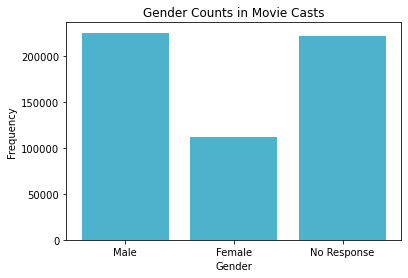

In [34]:
## CAST GENDER BAR CHART

import numpy as np
import matplotlib.pyplot as plt

height = [cag_list.count('2'), cag_list.count('1'), cag_list.count('0')]
bars = ('Male', 'Female', 'No Response')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color = (0.3,0.7,0.8))
plt.title('Movie Cast Gender Counts')
xlab = plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(y_pos, bars)
plt.show()

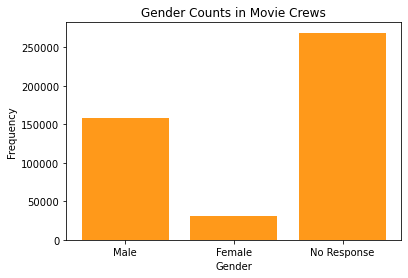

In [35]:
## CREW GENDER BAR CHART

import numpy as np
import matplotlib.pyplot as plt

height = [crg_list.count('2'), crg_list.count('1'), crg_list.count('0')]
bars = ('Male', 'Female', 'No Response')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color = (1,0.6,0.1))
 
plt.title('Movie Crew Gender Counts')
xlab = plt.xlabel('Gender')
plt.ylabel('Frequency')

xlab.set_position((0.5, 0.1)) #trying to add space between the x axis and its label Gender
plt.xticks(y_pos, bars)
plt.show()

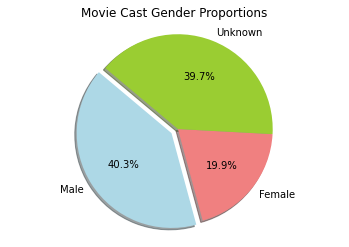

In [59]:
## CAST GENDER PIE CHART

import matplotlib.pyplot as plt

# Data to plot
labels = 'Male', 'Female', 'Unknown'
sizes = [cag_list.count('2'), cag_list.count('1'), cag_list.count('0')]
colors = ['lightblue', 'lightcoral','yellowgreen']
explode = (0.08, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title ('Movie Cast Gender Proportions')
plt.savefig('moviecast')
plt.show()

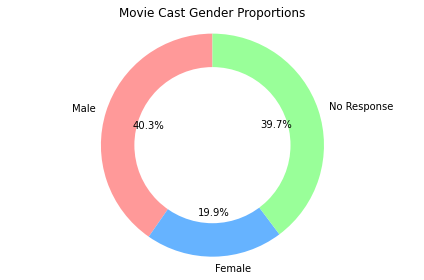

In [50]:
## CAST GENDER DONUT CHART

import matplotlib.pyplot as plt
# Pie chart
labels = ['Male', 'Female', 'No Response']
sizes = [cag_list.count('2'), cag_list.count('1'), cag_list.count('0')]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title ('Movie Cast Gender Proportions')
plt.tight_layout()
plt.show()

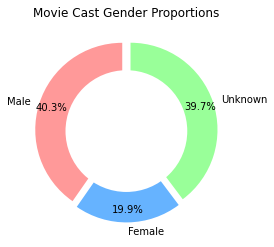

In [52]:
## CAST GENDER DONUT SPACED CHART 

import matplotlib.pyplot as plt
# Pie chart
labels = ['Male', 'Female', 'Unknown']
sizes = [cag_list.count('2'), cag_list.count('1'), cag_list.count('0')]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.title ('Movie Cast Gender Proportions')
plt.show()


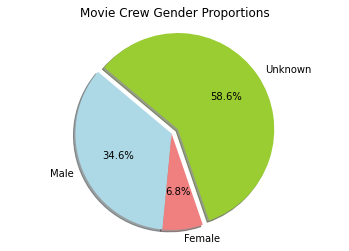

In [60]:
## CREW GENDER PIE CHART

import matplotlib.pyplot as plt

# Data to plot
labels = 'Male', 'Female', 'Unknown'
sizes = [crg_list.count('2'), crg_list.count('1'), crg_list.count('0')]
colors = ['lightblue', 'lightcoral','yellowgreen']
explode = (0, 0, 0.08)  # explode 3rd slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title ('Movie Crew Gender Proportions')
plt.savefig('moviecrew')
plt.show()

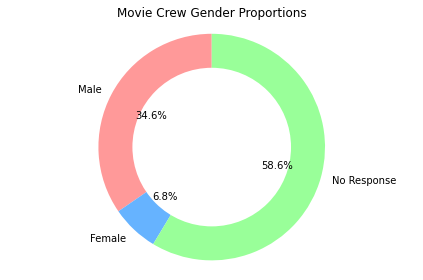

In [44]:
## CREW GENDER DONUT CHART

import matplotlib.pyplot as plt
# Pie chart
labels = ['Male', 'Female', 'No Response']
sizes = [crg_list.count('2'), crg_list.count('1'), crg_list.count('0')]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.title ('Movie Crew Gender Proportions')
plt.tight_layout()
plt.show()

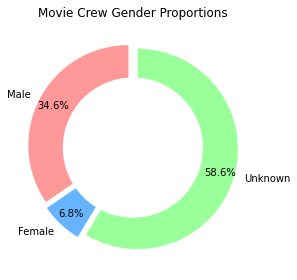

In [53]:
## CREW GENDER DONUT SPACED CHART 

import matplotlib.pyplot as plt
# Pie chart
labels = ['Male', 'Female', 'Unknown']
sizes = [crg_list.count('2'), crg_list.count('1'), crg_list.count('0')]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title ('Movie Crew Gender Proportions')
plt.tight_layout()
plt.show()